In [1]:
!pip install bertopic datasets Arabic-Stopwords --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Load data and create dataframe

In [2]:
from datasets import load_dataset

dataset = load_dataset("saudinewsnet")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for saudinewsnet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/saudinewsnet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(

Generating train split:   0%|          | 0/31030 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['source', 'url', 'date_extracted', 'title', 'author', 'content'],
        num_rows: 31030
    })
})

In [ ]:
dataset['train'][0]

{'source': 'aawsat',
 'url': 'http://aawsat.com/home/article/410826/بريطانيا-أربعة-محاور-لاستراتيجية-جديدة-تتصدى-للتطرف-على-مدى-خمس-سنوات',
 'date_extracted': '2015-07-21 02:51:32',
 'title': 'بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى للتطرف على مدى خمس سنوات',
 'author': 'لندن: رنيم حنوش',
 'content': 'حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليوم (الاثنين)، ملامح استراتيجية للتصدي للتطرف داخل بريطانيا؛ وهي مسألة اعتبرها كاميرون "صراع جيلنا"، متعهدا خلال خطابه في مدينة بيرمنغهام بالتصدي لهؤلاء الذين ينشرون التطرف بين الشبان المسلمين البريطانيين.\n\n ورسم كاميرون الاطار العام لاستراتيجية مكافحة التطرف التي المقرر ان تنشر كاملة في وقت لاحق هذا العام، والتي تسعى للتصدي لانتشار الأفكار المتطرفة التي يروج لها متشددو تنظيم "داعش".\n\n وحسبما تناقلت وسائل الإعلام البريطانية، فإن خطة رئيس الوزراء ستكون على مدى خمسة أعوام للقضاء على التطرف الداخلي من خلال أربعة محاور، وهي: القضاء على إيديولوجية التطرف، والوقوف في وجه عمليات التجنيد وغسل الأدمغة بالأفكار المتطرفة، وإعادة اصوات الاسلام الم

In [3]:
# Convert to dict

raw_dataset = [
    {
        'text': rec['content'],
        'source': rec['source'],
        'date': rec['date_extracted']
    }
    for rec in dataset['train']
]

In [17]:
# create dataframe
import pandas as pd

raw_dataset_df = pd.DataFrame(raw_dataset)
raw_dataset_df = raw_dataset_df.sample(frac=1, random_state=42) # Shuffle data

In [18]:
raw_dataset_df.head()

,text,source,date
16261,واس – جدة: تلقى خادم الحرمين الشريفين الملك س...,sabq,2015-08-01 07:51:33
28287,لفت وزير العدل أشرف ريفي في تصريح امس «انه لو...,almadina,2015-08-10 19:24:39
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح...,alriyadh,2015-08-06 01:13:10
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى...,alwatan,2015-08-10 19:44:53
2772,سبق- جدة: يقدّم الدكتور عبدالرحمن بن رجا الله...,sabq,2015-07-21 02:42:37


### Data Preprocessing

In [6]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


def clean_text(text: str):
  # check if string, yes then replace with empty string
  if not isinstance(text, str):
    return ""

  # replace urls with word رابط
  text = re.sub(r"http\S+", " رابط ", text)

  # replace digits with word رقم
  text = re.sub(r'\d+', " رقم ", text)

  # set space before and after any punctuation
  text = re.sub(r"([^\w\s])", r" \1 ", text)

  # remove extra spaces
  text = re.sub(r"\s+", " ", text)

  words = word_tokenize(text)
  text = " ".join([w for w in words if len(w) > 1])

  return text.lower().strip()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
raw_dataset_df['text'] = raw_dataset_df['text'].apply(clean_text)

In [20]:
# get the length to discard text with lower freq.
raw_dataset_df['text_len'] = raw_dataset_df['text'].apply(len)

In [21]:
raw_dataset_df.head()

,text,source,date,text_len
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,920
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1884
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,1196
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,2702
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,716


In [22]:
raw_dataset_df.shape

(31030, 4)

<Axes: xlabel='text_len', ylabel='Count'>

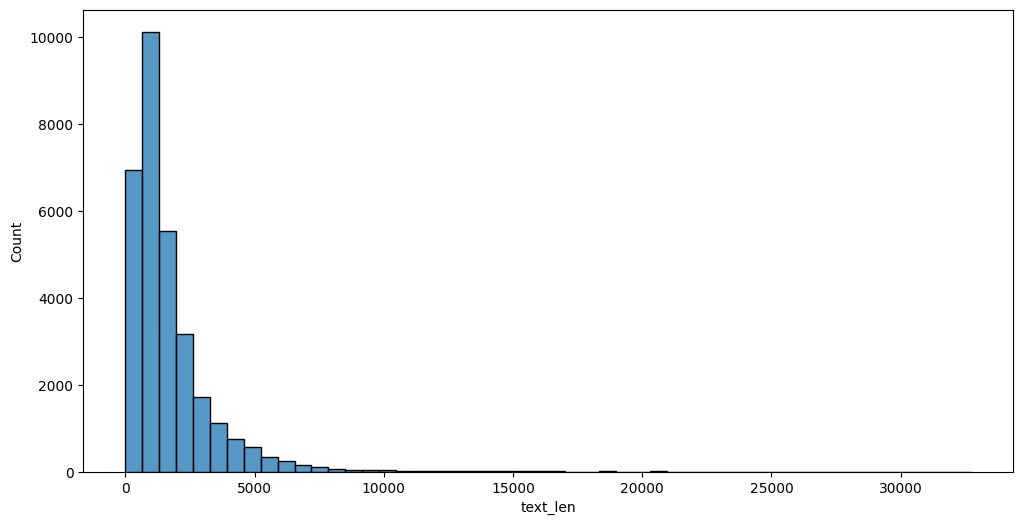

In [23]:
# Visualize text len

plt.figure(figsize=(12,6))
sns.histplot(raw_dataset_df['text_len'], bins = 50)

In [24]:
# Let's discrad length greater than 10_000

raw_dataset_df = raw_dataset_df[ raw_dataset_df['text_len'] <= 10_000 ]

In [25]:
# Remove duplicates

raw_dataset_df.drop_duplicates(['text'], inplace=True)

In [26]:
raw_dataset_df.shape

(29691, 4)

In [28]:
# convert date to pythob date object
from datetime import datetime

raw_dataset_df['datetime_stamp'] = raw_dataset_df['date'].apply(lambda v: datetime.strptime(v, "%Y-%m-%d %H:%M:%S"))

raw_dataset_df['datetime_stamp'] = raw_dataset_df['datetime_stamp'].apply(lambda v: v.replace(hour=0, minute=0, second=0))

In [29]:
raw_dataset_df.head()

,text,source,date,text_len,datetime_stamp
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,920,2015-08-01
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1884,2015-08-10
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,1196,2015-08-06
28752,حوادث المعلمات ومعاناتهن في الوصول يوميا إلى م...,alwatan,2015-08-10 19:44:53,2702,2015-08-10
2772,سبق جدة يقد الدكتور عبدالرحمن بن رجا الله السل...,sabq,2015-07-21 02:42:37,716,2015-07-21


### Embedding model

In [30]:
from sentence_transformers import SentenceTransformer

model_name = "sentence-transformers/LaBSE"

embedding_model = SentenceTransformer(
    model_name,
    device = 'cuda:0'
)

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [31]:
embeddings = embedding_model.encode(
    raw_dataset_df['text'].values,
    show_progress_bar=True
)

Batches:   0%|          | 0/928 [00:00<?, ?it/s]

In [32]:
embeddings.shape

(29691, 768)

### Dim Reduction

In [33]:
from umap import UMAP

umap_model = UMAP(
    n_neighbors = 15,
    n_components = 15,
    min_dist = 0.0,
    metric = 'cosine',
    random_state = 42
)

### Clustering

In [35]:
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.

hdbscan_model = HDBSCAN(
    min_cluster_size = 50,
    metric = 'euclidean',
    cluster_selection_method = 'eom',
    prediction_data = True
)

### Vectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(
    min_df = 3, # if a word appeared in 3 docs or less discard it
    stop_words = stop_words,
    analyzer = 'word',
    max_df = 0.5, # if a word appeared in more than half of the docs discard it
    ngram_range = (1, 3) # Unigram, Bigram, Trigram
)

### Topic Representer
to represent topics as words or phrases not just ids

In [37]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "KeyBERT": keybert_model
}

### Wrapping all together

In [39]:
from bertopic import BERTopic

topic_model = BERTopic(
    embedding_model = embedding_model,
    umap_model = umap_model,
    hdbscan_model = hdbscan_model,
    vectorizer_model = vectorizer_model,
    representation_model = representation_model,
    top_n_words = 10,
    verbose = True
)

topics, probs =  topic_model.fit_transform(
    raw_dataset_df['text'].values,
    embeddings
)

2024-05-18 07:25:51,436 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-18 07:26:58,817 - BERTopic - Dimensionality - Completed ✓
2024-05-18 07:26:58,822 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
2024-05-18 07:27:05,479 - BERTopic - Cluster - Completed ✓
2024-05-18 07:27:05,491 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-18 07:28:06,188 - BERTopic - Representation - Completed ✓


In [43]:
# let's explore one example

print(
    raw_dataset_df['text'].values[16],
    topics[16], probs[16]
)

أكدت دراسة أن الأشخاص الذين يجلسون دون حركة لساعات يوميا ربما يكونون أكثر عرضة للإصابة بمرض السكري مقارنة بمن يتحركون لفترات أطول خلال اليوم وقدم الباحثون أجهزة لقياس التسارع لنحو ألفي شخص لرصد تحركاتهم خلال ساعات الاستيقاظ لنحو أسبوع وبعد خمسة أعوام وبالمقارنة مع الأشخاص الذين يجلسون لأقل من ست ساعات منذ بداية الدراسة فإن الأشخاص الذين يجلسون دون حركة لأكثر من عشر ساعات في اليوم زادت احتمالات إصابتهم بمرض السكري بواقع أربعة أمثال وبالمقارنة مع الأشخاص الذي يجلسون لأقل من ست ساعات يوميا كان الأشخاص الذين يجلسون دون حركة لأكثر من عشر ساعات يوميا أكثر عرضة للإصابة باختلال في سكر الدم الذي كثيرا ما يتطور إلى مرض السكري وقالت بيتاني بارون جيبس التي قادت الدراسة وهي باحثة في مجال الصحة والنشاط البدني في جامعة بيتسبرج `` بدأنا نؤمن أن كثرة الجلوس أمر مختلف عن عدم ممارسة الرياضة `` وقالت في رسالة بالبريد الإلكتروني `` الشخص الذي يجري لنصف ساعة يوميا ربما يجلس دون حركة لمدة رقم ساعة في العمل وفي وسائل النقل وفي المنزل وهذا الشخص ربما يصنف بأنه نشيط بدنيا لكنه كثير الجلوس أيضا `` 9 0.9370839203

In [44]:
topic_model.get_topic(9)

[('الجسم', 0.019973977654557284),
 ('القلب', 0.01954099088213382),
 ('الباحثون', 0.019150582303073656),
 ('الدم', 0.018030103430696012),
 ('الإصابة', 0.013242833373252515),
 ('المريض', 0.012173211367355741),
 ('النوم', 0.011903892458991249),
 ('الحمل', 0.011363709766680523),
 ('الكبد', 0.011142276419225161),
 ('ضغط الدم', 0.010258644750241715)]

In [45]:
# Let's add topics and probabilties to dataframe

raw_dataset_df['topics'] = topics
raw_dataset_df['probs'] = probs

In [47]:
raw_dataset_df[ raw_dataset_df['topics'] == 9 ].head(10)

,text,source,date,text_len,datetime_stamp,topics,probs
14826,من المسائل التي من الله بها على المرأة دون الر...,okaz,2015-07-31 12:21:44,1055,2015-07-31,9,0.756482
18422,أكدت دراسة أن الأشخاص الذين يجلسون دون حركة لس...,alwatan,2015-08-03 19:59:51,985,2015-08-03,9,0.937084
16757,,aljazirah,2015-08-02 23:47:00,0,2015-08-02,9,0.431867
18078,لقد أثبتت الدراسات أن خطورة الموت بسبب أمراض ا...,aljazirah,2015-08-03 21:10:31,2144,2015-08-03,9,0.707222
12989,القاهرة متابعات تتعرض العديد من النساء الدنمار...,3alyoum,2015-07-31 04:22:38,1279,2015-07-31,9,0.379222
13816,التعرق الليلي أو التعرق خلال النوم مشكلة طبية ...,alriyadh,2015-07-31 03:49:52,2471,2015-07-31,9,0.461179
23636,من السهل على أحدنا حينما عاني من مشكلة صحية ما...,aawsat,2015-08-07 06:23:33,4595,2015-08-07,9,0.797731
3254,تمكن فريق من الأطباء الباكستانيين من ابتكار دو...,aleqtisadiya,2015-07-22 17:51:38,784,2015-07-22,9,0.284172
30119,خلصت دراسة سويدية إلى أن الأطفال الذين يأكلون ...,alriyadh,2015-08-11 14:19:19,975,2015-08-11,9,1.000000
18236,بذور العنب ما فائدة بذور العنب وهل يوجد مستحضر...,alriyadh,2015-08-03 20:10:18,2468,2015-08-03,9,0.654454


In [49]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9439,-1_مليار_رقم مليار_بنسبة رقم رقم_رقم رقم مليار,"[مليار, رقم مليار, بنسبة رقم رقم, رقم رقم مليا...","[للسياحة والتراث الوطني, للسياحة والتراث, المل...",[استقبل نائب خادم الحرمين الشريفين صاحب السمو ...
1,0,4093,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[الموسم الماضي, الموسم المقبل, المباريات, اللا...",[وصلت بعثة فريق الهلال الكروي الأول إلى العاصم...
2,1,970,1_عدن_المقاومة_الحوثيين_الحوثي,"[عدن, المقاومة, الحوثيين, الحوثي, اليمن, الشعب...","[عدن, مطار عدن, الحوثيين وقوات, محافظة عدن, ها...",[سيطرت القوات الموالية لحكومة الرئيس اليمني عب...
3,2,681,2_إيران_الاتفاق_النووي_الإيراني,"[إيران, الاتفاق, النووي, الإيراني, الاتفاق الن...","[الاتفاق النووي إيران, الاتفاق النووي الإيراني...",[يثير التطبيع الغربي مع إيران مخاوف دبلوماسيين...
4,3,607,3_بشرطة_القبض_التحرش_الجهات الأمنية,"[بشرطة, القبض, التحرش, الجهات الأمنية, مقطع, ا...","[الإعلامي لشرطة, مقطع فيديو, الفيديو, مقطع الف...",[وج صاحب السمو الملكي الأمير خالد الفيصل مستشا...
...,...,...,...,...,...,...
89,88,53,88_الحملة_السوريين_الوطنية السعودية_الأشقاء,"[الحملة, السوريين, الوطنية السعودية, الأشقاء, ...","[للأشقاء اللاجئين السوريين, اللاجئين السوريين,...",[أنهت الحملة الوطنية السعودية المرحلة الثالثة ...
90,89,52,89_حرس_حرس الحدود_البحث والإنقاذ_والإنقاذ,"[حرس, حرس الحدود, البحث والإنقاذ, والإنقاذ, ال...","[فرق البحث والإنقاذ, البحث والإنقاذ, والإنقاذ,...",[باشرت فرق البحث والإنقاذ في قطاعات حرس الحدود...
91,90,52,90_موبايلي_خدمات الاتصالات_التجمعات_العملاء,"[موبايلي, خدمات الاتصالات, التجمعات, العملاء, ...","[خدمات الاتصالات, شركة الاتصالات السعودية, عدد...",[عبدالسلام العنزي سبق الرياض أنجزت هيئة الاتصا...
92,91,52,91_طن_المزارعين_القمح_مستحقات,"[طن, المزارعين, القمح, مستحقات, الدفعة, المؤسس...","[لصوامع الغلال ومطاحن, الغلال ومطاحن الدقيق, و...",[أتمت المؤسسة العامة لصوامع الغلال ومطاحن الدق...


In [50]:
topic_model.visualize_topics()

In [51]:
topic_model.visualize_heatmap()

In [52]:
topics_per_class = topic_model.topics_per_class(
    raw_dataset_df['text'].values,
    classes = raw_dataset_df['source'].values,
)
topic_model.visualize_topics_per_class(
    topics_per_class,
    top_n_topics = 20
)

14it [00:24,  1.78s/it]


In [53]:
topics_over_time = topic_model.topics_over_time(
    raw_dataset_df['text'].values,
    raw_dataset_df['datetime_stamp'].values
)
topic_model.visualize_topics_over_time(
    topics_over_time,
    topics = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
)

18it [02:03,  6.85s/it]


In [54]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)
topic_model.visualize_hierarchy(
    hierarchical_topics = hierarchical_topics
)

100%|██████████| 92/92 [00:00<00:00, 103.70it/s]


In [55]:
topics_to_merge = [
    [57, 70, 53],
    [48, 15, 60]
]

topic_model.merge_topics(
    raw_dataset_df['text'].values,
    topics_to_merge
)

In [56]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)
topic_model.visualize_hierarchy(
    hierarchical_topics = hierarchical_topics
)

100%|██████████| 88/88 [00:01<00:00, 84.14it/s]


### Topic Filtering

In [58]:
# Remove data for topic -1

filtered_raw_dataset_df = raw_dataset_df[ ~raw_dataset_df['topics'].isin([-1]) ]

### Inference

In [59]:
story = """
طرحت مؤسسة البترول الكويتية عطاءً؛ لبيع زيت وقود عالي الكبريت للتحميل في الفترة من فبراير/ شباط إلى إبريل/ نيسان.
وأوضحت مصادر تجارية، اليوم الخميس، أن المؤسسة تعرض شحنات من زيت الوقود عالي الكبريت تبلغ الواحدة 60 ألف طن لتحميلها من الكويت شهرياً بالفترة المذكورة.
"""

_topic, _prob =  topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-05-18 07:48:47,787 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-05-18 07:49:07,430 - BERTopic - Dimensionality - Completed ✓
2024-05-18 07:49:07,436 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-05-18 07:49:07,439 - BERTopic - Cluster - Completed ✓


In [60]:
_topic, _prob

([11], array([0.71672921]))

In [61]:
topic_model.get_topic(_topic[0])

[('النفط', 0.055392390842511394),
 ('برميل', 0.032398932182983654),
 ('الخام', 0.028615085047862778),
 ('للبرميل', 0.024342434296464575),
 ('رقم دولار', 0.020918344275783516),
 ('رقم رقم دولار', 0.019926428663665674),
 ('أسعار النفط', 0.01941465855887257),
 ('مليون برميل', 0.019193316001579447),
 ('برميل يوميا', 0.017914175368554167),
 ('رقم مليون برميل', 0.017670545822620405)]

In [63]:
filtered_raw_dataset_df[ filtered_raw_dataset_df['topics'] == _topic[0] ].head()

,text,source,date,text_len,datetime_stamp,topics,probs
21540,استعرضت اللجنة المحلية للانتخابات البلدية بمنط...,almadina,2015-08-06 01:07:24,1575,2015-08-06,11,0.686372
30934,القريات رقم شوال رقم هـ الموافق رقم أغسطس رقم ...,was,2015-08-11 18:37:13,697,2015-08-11,11,0.976338
23292,أطلقت اللجنة المحلية للانتخابات البلدية بمنطقة...,okaz,2015-08-06 08:19:43,879,2015-08-06,11,0.588517
29318,أملج رقم شوال رقم هـ الموافق رقم أغسطس رقم واس...,was,2015-08-10 20:52:59,972,2015-08-10,11,1.000000
27559,توقع مهتمون بالشأن المحلي إقبال أفراد المجتمع ...,okaz,2015-08-09 17:46:40,2230,2015-08-09,11,0.697779


### Save the model

In [ ]:
model_name = "sentence-transformers/LaBSE"
topic_model.save(
    "/content/safe_bertopic",
    serialization = "safetensors",
    save_ctfidf = True,
    save_embedding_model = model_name)

loaded_model = BERTopic.load("/content/safe_bertopic")

In [ ]:
topic_model.save(
    "/content/pickel_bert_topic_news.pkl",
    serialization = "pickle"
)

loaded_model = BERTopic.load("/content/pickel_bert_topic_news.pkl")